# Lab 8: Radiomics and Machine Learning for Imaging

## Overview
In this lab, we will cover the following topics:
### Part 1 - Transforming Unstructured Imaging Data to ML-Ready Data
1. Loading and exploring DICOM images
2. Loading and exploring NIfTI images and masks
3. Extracting radiomics features using PyRadiomics
### Part 2 - ML Fun Time
4. Building survival and classification models to predict patient outcomes based on radiomic features

## Review
### Structured vs. Unstructured Data

<img src="Graphics/Structured-vs-Unstructured-Data.png" alt="drawing" style="width:800px;"/>

**Structured Data**: This type of data is highly organized and easily searchable in databases. Examples include clinical data, patient demographics, and radiomics features extracted from medical images.

**Unstructured Data**: This type of data lacks a predefined format or organization, making it more challenging to process and analyze. Examples include raw medical images (DICOM, NIfTI) and free-text clinical notes.

### Basics of Radiomics

<img src="Graphics/radiomics-workflow.webp" alt="drawing" style="width:800px;"/>

Radiomics effectively converts unstructured data (medical imaging) to structured data (radiomics features) by:

- Extracting a large number of features from medical images using data-characterization algorithms;
- These algorithms:
    - Quantify tumor heterogeneity, shape, texture, and intensity; and
    - Have the potential to provide valuable information for diagnosis, prognosis, and treatment response.

### Machine Learning Techniques for Radiomics

Machine learning (ML) techniques can be applied to radiomics to build predictive models for various clinical outcomes. Common ML techniques used in radiomics include:

| **Model/Technique** | **Description** | **Examples** |
|----------------|-----------------|--------------|
| Classification Models | Used to predict categorical outcomes, such as the presence or absence of a disease. | Logistic Regression, k-Nearest Neighbours (kNN), Support Vector Machines (SVM), Random Forests |
| Survival Models | Used to predict time-to-event outcomes, such as patient survival time. | Cox Proportional Hazards Model, Random Survival Forests |
| Regression Models | Used to predict continuous outcomes, such as tumor volume or patient age. | Linear Regression, Regularized Regression |
| Feature Selection and Dimensionality Reduction | Techniques used to reduce the number of features and improve model performance. | Principal Component Analysis (PCA), LASSO, Removal of redundant features, etc. |

## Part 1: Going from Unstructured Data to Structured Data

### (1) DICOM Loading and Handling

In this section, we will:
- Load computed tomography (CT) and positron emission tomography (PET) images in DICOM format, 
- Explore their structure and metadata, and 
- Visualize the images.

For this section, both (anonymized) images are from the same patient, which was sourced from the [Non-Small Cell Lung Cancer (NSCLC) Radiogenomics collection](https://www.cancerimagingarchive.net/collection/nsclc-radiogenomics/) on [The Cancer Imaging Archive (TCIA)](https://www.cancerimagingarchive.net/).

In [ ]:
import pydicom
import matplotlib.pyplot as plt


pydicom?

Type:        module
String form: <module 'pydicom' from '/Users/arthickah/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/pydicom/__init__.py'>
File:        ~/Desktop/BINF-5507-Materials/.pixi/envs/default/lib/python3.13/site-packages/pydicom/__init__.py
Docstring:  
pydicom package -- easily handle DICOM files.
   See Quick Start below.

-----------
Quick Start
-----------

1. A simple program to read a dicom file, modify a value, and write to a new
   file::

    from pydicom.filereader import dcmread
    dataset = dcmread("file1.dcm")
    dataset.PatientName = 'anonymous'
    dataset.save_as("file2.dcm")

2. See the files in the examples directory that came with this package for more
   examples, including some interactive sessions.

3. Learn the methods of the Dataset class; that is the one you will work with
   most directly.

4. Questions and comments can be directed to the pydicom google group:
   https://groups.google.com/g/pydicom

5. Bugs and other

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4334.1501.114738774398353912030599477594
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4334.1501.114738774398353912030599477594
(0008,0020) Study Date                   

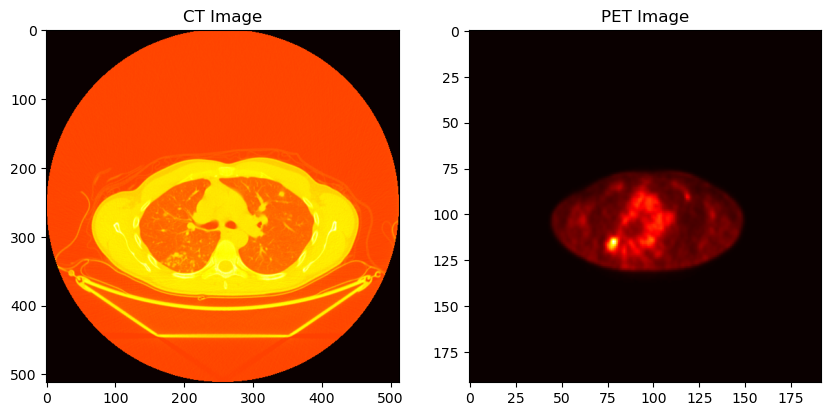

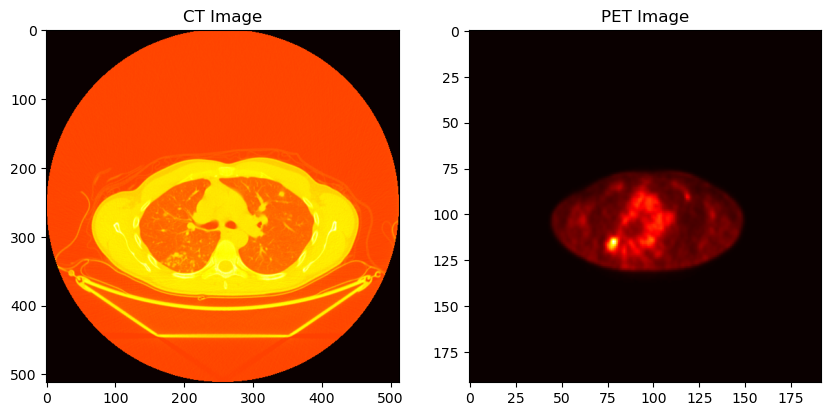

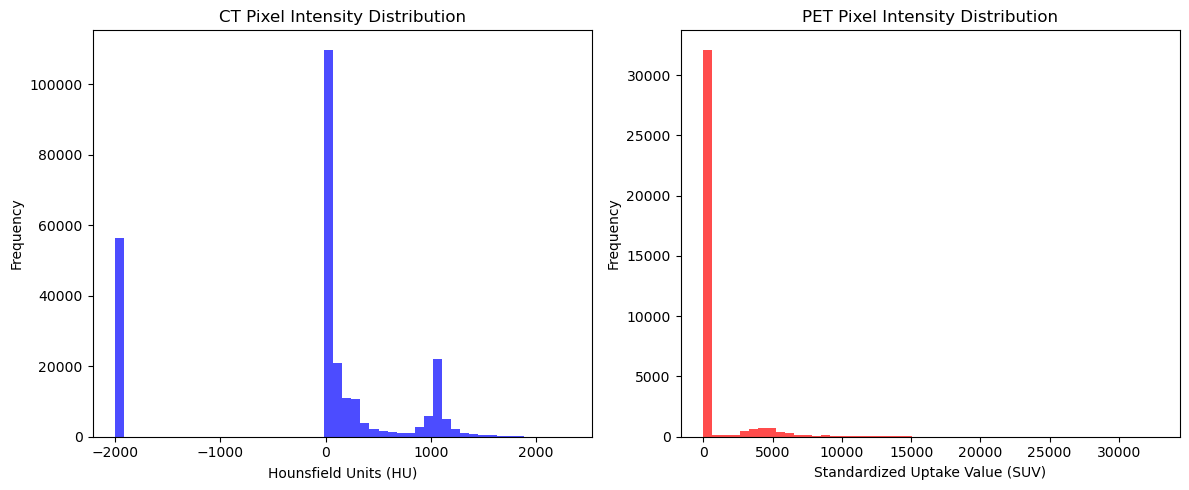

In [11]:
# Load a CT DICOM file
ct_dicom_file = 'Imaging Data/CT/1-086.dcm'
ct_dicom_data = pydicom.dcmread(ct_dicom_file)

# Load a PET DICOM file
pet_dicom_file = 'Imaging Data/PET/1-085.dcm'
pet_dicom_data = pydicom.dcmread(pet_dicom_file)

# Explore the structure and metadata
print(ct_dicom_data)
print(pet_dicom_data)



# Display the images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(ct_dicom_data.pixel_array, cmap=plt.cm.hot) #chnging grey can change the color of the image
axes[0].set_title('CT Image')
axes[1].imshow(pet_dicom_data.pixel_array, cmap=plt.cm.hot)
axes[1].set_title('PET Image')
plt.show()

import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Load the DICOM files
ct_dicom_file = 'Imaging Data/CT/1-086.dcm'
ct_dicom_data = pydicom.dcmread(ct_dicom_file)

pet_dicom_file = 'Imaging Data/PET/1-085.dcm'
pet_dicom_data = pydicom.dcmread(pet_dicom_file)

# Extract pixel arrays
ct_pixels = ct_dicom_data.pixel_array
pet_pixels = pet_dicom_data.pixel_array

# Display the images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(ct_pixels, cmap=plt.cm.hot)  # CT is typically grayscale
axes[0].set_title('CT Image')
axes[1].imshow(pet_pixels, cmap=plt.cm.hot)  # PET often uses a heatmap
axes[1].set_title('PET Image')
plt.show()

# Plot histograms of pixel intensities
plt.figure(figsize=(12, 5))

# CT Histogram
plt.subplot(1, 2, 1)
plt.hist(ct_pixels.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('CT Pixel Intensity Distribution')
plt.xlabel('Hounsfield Units (HU)')
plt.ylabel('Frequency')

# PET Histogram
plt.subplot(1, 2, 2)
plt.hist(pet_pixels.flatten(), bins=50, color='red', alpha=0.7)
plt.title('PET Pixel Intensity Distribution')
plt.xlabel('Standardized Uptake Value (SUV)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Questions for Exploration

1. **Exploring DICOM Metadata:**
    - What is the `Patient's Age` and `Patient's Sex`? 
    age is 34 and sex if male
    - Identify the `Manufacturer` and `Modality` for both the CT and PET images. 
    manufacturer:GE MEDICAL SYSTEMS, modality:CT
    - What is the `Slice Thickness` for the CT and PET images?

2. **Visualizing DICOM Images:**
    - How do the CT and PET images differ in terms of `pixel spacing` and resolution? (No need to calculate the resolution, just comment on the difference.)
    DS: [0.976562, 0.976562] 
    DS: [3.6458332538605, 3.6458332538605] higher the resolution more the detailed image captured. less pixel spacing 

    - Adjust the colormap of the displayed images to `hot` and observe the differences. What do you notice?

3. **Analyzing Image Data:**
    - Plot histograms of the pixel intensity values for both images. How do the distributions compare?

4. **Advanced Exploration:**
    - Using the `Rescale Intercept` and `Rescale Slope` values, convert the pixel values of the CT image to Hounsfield Units (HU). What is the range of HU values in the CT image? HINT: imaging data is stored in smaller formats for data storage considerations, and is typically scaled back into 'real-world' values when viewing; check out the details on [`Rescale Intercept` and `Rescale Slope` attributes](https://dicom.innolitics.com/ciods/digital-x-ray-image/dx-image/00281052).

    
```


### (2) NIfTI Loading and Handling

In this section, we will: 
- Load a NIfTI image and its corresponding mask, 
- Explore their structure and metadata, and 
- Visualize the data using a 3D scroller. 

For this section, we will look at Magnetic Resonance (MR) of the brain, where the patient was diagnosed with low grade glioma. The mask is spatially co-registered with the image with the convention of an intensity of `True` or 1 where the voxel corresponds to tumor, and `False` or 0 where the voxel corresponds to normal tissue or background.

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Load a NIfTI file and its mask
nifti_file = 'Imaging Data/NII/image.nii'
mask_file = 'Imaging Data/NII/mask.nii.gz'
nifti_data = nib.load(nifti_file)
mask_data = nib.load(mask_file)

# Extract the image and mask data
image_data = nifti_data.get_fdata()
mask_data = mask_data.get_fdata()

# Explore the structure and metadata
print(nifti_data)
# print(mask_data) 

# Function to display slices
def show_slices(slice_idx):
    # clear output
    plt.close('all')
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image_data[:, :, slice_idx], cmap='gray')
    axes[0].set_title('NIfTI Image')
    axes[1].imshow(mask_data[:, :, slice_idx], cmap='gray')
    axes[1].set_title('Mask')
    plt.show()

# Create a slider widget
slice_slider = widgets.IntSlider(min=0, max=image_data.shape[2]-1, step=1, description='Slice')

# Create an interactive widget
interactive_plot = widgets.interactive(show_slices, slice_idx=slice_slider)

# Display the slider and output
display(interactive_plot)

### Questions for Exploration

1. **Exploring NIfTI Metadata:**
    - What are the dimensions of the NIfTI image and mask? the dimension of the nifti is 54
    - Identify the voxel size (spacing) for the NIfTI image.
    - What is the data type of the image and mask?

2. **Visualizing NIfTI Images:**
    - How do the image and mask differ in terms of intensity values?
    - Adjust the colormap of the displayed images to `hot` and observe the differences. What do you notice?

3. **Analyzing Image Data:**
    - Plot histograms of the voxel intensity values for both the image and mask. How do the distributions compare?
    - Visualize multiple slices and comment on the anatomical structures visible.

4. **Advanced Exploration:**
    - Using the voxel intensity values, calculate the mean and standard deviation of the image within the mask region. How do these statistics compare to the entire image?

### (3) Radiomics Feature Extraction

In this section, we will use PyRadiomics to extract radiomics features from the NIfTI image and mask.

In [1]:
import radiomics
from radiomics import featureextractor

# Define the settings for PyRadiomics
# params = 'Imaging Data/pyradiomics_params.yaml'  # Optional: Path to a YAML file with custom settings
extractor = featureextractor.RadiomicsFeatureExtractor() # HINT: Use the 'params' argument to load custom settings

# Extract radiomics features
features = extractor.execute(nifti_file, mask_file)

print('Number of features extracted:', len(features))

# Display the extracted features
for key, value in features.items():
    print(f'{key}: {value}')

ModuleNotFoundError: No module named 'radiomics'

In [5]:
featureextractor.RadiomicsFeatureExtractor?

Init signature: featureextractor.RadiomicsFeatureExtractor(*args, **kwargs)
Docstring:     
Wrapper class for calculation of a radiomics signature.
At and after initialisation various settings can be used to customize the resultant signature.
This includes which classes and features to use, as well as what should be done in terms of preprocessing the image
and what images (original and/or filtered) should be used as input.

Then a call to :py:func:`execute` generates the radiomics
signature specified by these settings for the passed image and labelmap combination. This function can be called
repeatedly in a batch process to calculate the radiomics signature for all image and labelmap combinations.

At initialization, a parameters file (string pointing to yaml or json structured file) or dictionary can be provided
containing all necessary settings (top level containing keys "setting", "imageType" and/or "featureClass). This is
done by passing it as the first positional argument. If no p

### Questions for Exploration

**Exploring Radiomics Parameters:**
- What are the default settings used by the `RadiomicsFeatureExtractor`? How can you customize these settings using a YAML file?
- Load the parameters from the provided YAML file (`params`). How do these settings differ from the default settings?
- How many features are extracted from the NIfTI image and mask:
    - Using default settings?
    - Using the parameter file?

## Part 2: Using the Structured Data for ML

### (4) Building Survival and Classification Models

In this section, we will: 
- Build survival and 
- Classification models 

using the extracted radiomics features and clinical data to predict patient status/outcomes.

For this section, the clinical and radiomic features were sourced from the [Non-Small Cell Lung Cancer (NSCLC) Radiogenomics collection](https://www.cancerimagingarchive.net/collection/nsclc-radiogenomics/) on [The Cancer Imaging Archive (TCIA)](https://www.cancerimagingarchive.net/); Radiomic feature extraction has already been completed for convenience.

### Data Loading and Curation

In [6]:
import pandas as pd
from sksurv.util import Surv

# Load clinical data and radiomics features
clinical = pd.read_csv('NSCLC Dataset/clinical.csv')
radiomics = pd.read_csv('NSCLC Dataset/radiomics.csv')
print('Total number of patients in clinical dataset:', len(clinical))
print('Total number of patients in radiomics dataset:', len(radiomics))

# Keep only patients that are in both clinical and radiomics datasets
common_patients = set(clinical['patient_ID']).intersection(set(radiomics['patient_ID']))
clinical = clinical[clinical['patient_ID'].isin(common_patients)]
radiomics = radiomics[radiomics['patient_ID'].isin(common_patients)]
print('Number of patients in common:', len(common_patients))

# ----- CLASSIFICATION TARGET -----
# Define target variable for binary classification
target_column = 'Histology'
target_dict = {'Histology' : ['Histology ','Adenocarcinoma'], 
               'EGFR' : ['EGFR mutation status','Wildtype'],
               'KRAS' : ['KRAS mutation status','Wildtype']}

class_data = clinical[target_dict[target_column][0]].values != target_dict[target_column][1]

# ----- SURVIVAL DATA -----
# Convert date columns to datetime format
clinical["Date of Last Known Alive"] = pd.to_datetime(clinical["Date of Last Known Alive"], format="%m/%d/%Y")
clinical["CT Date"] = pd.to_datetime(clinical["CT Date"], format="%m/%d/%Y")

# Calculate time in days
clinical["time"] = (clinical["Date of Last Known Alive"] - clinical["CT Date"]).dt.days - clinical['Days between CT and surgery']

# Convert event column to boolean (Death = True, Alive = False)
clinical["event"] = clinical["Survival Status"].apply(lambda x: True if x == "Dead" else False)

# Convert to sksurv structured array format
survival_data = Surv.from_dataframe("event", "time", clinical)




Total number of patients in clinical dataset: 211
Total number of patients in radiomics dataset: 126
Number of patients in common: 126


In [ ]:
# print some information about the data
radiomics.head()
clinical.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Columns: 1782 entries, patient_ID to lbp-2D_ngtdm_Strength
dtypes: float64(1732), int64(49), object(1)
memory usage: 1.7+ MB


### Model Building and Testing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import average_precision_score
import numpy as np

# Split the data into features (X) and target (y)
X = radiomics.drop(columns=['patient_ID'])
y_survival = survival_data.copy()
y_classification = class_data.copy()



# Split the data into training and testing sets
X_train, X_test, y_train_survival, y_test_survival = train_test_split(X, y_survival, test_size=0.2, random_state=42)
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Define preprocessing for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Build and evaluate a survival model (RandomSurvivalForest)
rsf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomSurvivalForest(n_estimators=200, min_samples_split=10, min_samples_leaf=15, max_features="sqrt", n_jobs=-1, random_state=42))
])

rsf_pipeline.fit(X_train, y_train_survival)
y_pred_survival = rsf_pipeline.predict(X_test)
c_index = concordance_index_censored(y_test_survival['event'], y_test_survival['time'], y_pred_survival)
print(f'Survival Model Concordance Index: {c_index[0]}')

# Build and evaluate a classification model (LogisticRegression)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

clf_pipeline.fit(X_train, y_train_classification)
y_pred_classification = clf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test_classification, y_pred_classification)
avg_precision = average_precision_score(y_test_classification, y_pred_classification)
print(f'Classification Model Accuracy: {accuracy}')
class_imbalance = np.sum(y_test_classification) / len(y_test_classification)
print(f'Class imbalance: {class_imbalance}')
print(f'Classification Model Average Precision Score: {avg_precision}')

Survival Model Concordance Index: 0.6407185628742516
Classification Model Accuracy: 0.6538461538461539
Class imbalance: 0.15384615384615385
Classification Model Average Precision Score: 0.15109890109890112


### Questions for Exploration

1. **Exploring Radiomics Data:**
    - What are the dimensions of the `radiomics_data` dataframe?
    
    - How many unique patients are there in the `radiomics_data` dataframe?

2. **Analyzing and Visualizing Radiomics Features:**
    - Calculate the correlation matrix of the radiomics features. Which features are highly correlated?
    - Use a heatmap to visualize the correlation matrix of the radiomics features. Which features show strong positive or negative correlations?

3. **Advanced Exploration:**
    - Try different imputation strategy - does it have an effect on model performance?
    - Try MinMax scaling instead of Standard scaling - does it have an effect on model performance?
    - Perform a Principal Component Analysis (PCA) on the radiomics features. How many principal components explain most of the variance in the data?
    - Cluster the radiomics features using k-means clustering. How many clusters provide the best separation of the data?
    - Does a reduced dataset of radiomics features provide similar predictive performance compared to the full dataset?